<a href="https://colab.research.google.com/github/Zaydanmoti/zaydanmoti/blob/main/grid_stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#description this program detects stabiltiy fro smart grids, based of Data

In [ ]:
#import libaries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the data 
from google.colab import files
uploaded = files.upload()
df=pd.read_csv("smart_grid_stability_augmented.csv")
df.head(7)




Saving smart_grid_stability_augmented.csv to smart_grid_stability_augmented.csv


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954,unstable


In [ ]:
#count the number of rows and columns in the data set
df.shape

(60000, 14)

In [ ]:
#get a count of number of stable (s) or unstable (uns) cells
df["stabf"].value_counts()

unstable    38280
stable      21720
Name: stabf, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


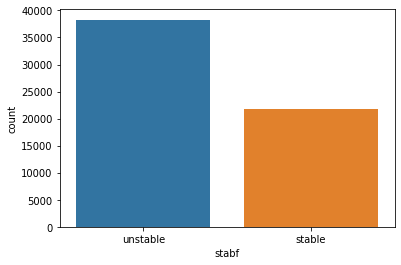

In [ ]:
#visualize the count 
sns.countplot(df["stabf"],label="count")

In [ ]:
#look at the data types to see which data needs to be encoded
df.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object

In [ ]:
#encode the categorical data value 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,13] = labelencoder_Y.fit_transform(df.iloc[:,13].values)

df.iloc[:,13]



0        1
1        0
2        1
3        1
4        1
        ..
59995    1
59996    0
59997    0
59998    1
59999    1
Name: stabf, Length: 60000, dtype: int64

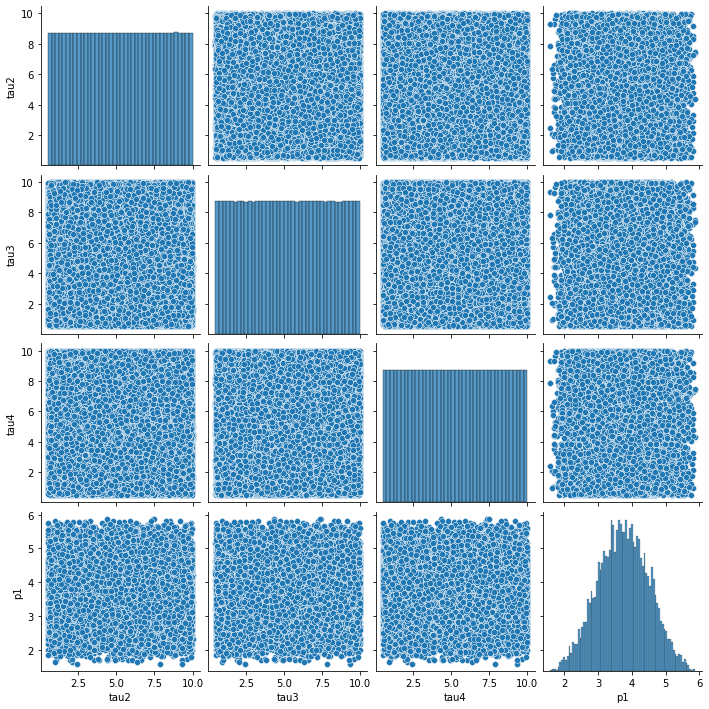

In [ ]:
#create a pair plot
sns.pairplot(df.iloc[:,1:5], )

In [ ]:
#print the first 5 rows of data set
df.head(5)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,1


In [ ]:
#get the correlation of the columns 
df.iloc[:,1:12].corr()

,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
tau2,1.000000,0.005554,0.005554,0.003004,-0.004473,-0.000372,-0.000372,-0.005832,0.009865,0.002102,0.002102
tau3,0.005554,1.000000,0.005554,0.003004,-0.000372,-0.004473,-0.000372,-0.005832,0.002102,0.009865,0.002102
tau4,0.005554,0.005554,1.000000,0.003004,-0.000372,-0.000372,-0.004473,-0.005832,0.002102,0.002102,0.009865
p1,0.003004,0.003004,0.003004,1.000000,-0.578983,-0.578983,-0.578983,0.000721,0.000341,0.000341,0.000341
p2,-0.004473,-0.000372,-0.000372,-0.578983,1.000000,0.002833,0.002833,-0.000417,-0.002141,0.000774,0.000774
p3,-0.000372,-0.004473,-0.000372,-0.578983,0.002833,1.000000,0.002833,-0.000417,0.000774,-0.002141,0.000774
p4,-0.000372,-0.000372,-0.004473,-0.578983,0.002833,0.002833,1.000000,-0.000417,0.000774,0.000774,-0.002141
g1,-0.005832,-0.005832,-0.005832,0.000721,-0.000417,-0.000417,-0.000417,1.000000,0.004718,0.004718,0.004718
g2,0.009865,0.002102,0.002102,0.000341,-0.002141,0.000774,0.000774,0.004718,1.000000,-0.006939,-0.006939
g3,0.002102,0.009865,0.002102,0.000341,0.000774,-0.002141,0.000774,0.004718,-0.006939,1.000000,-0.006939


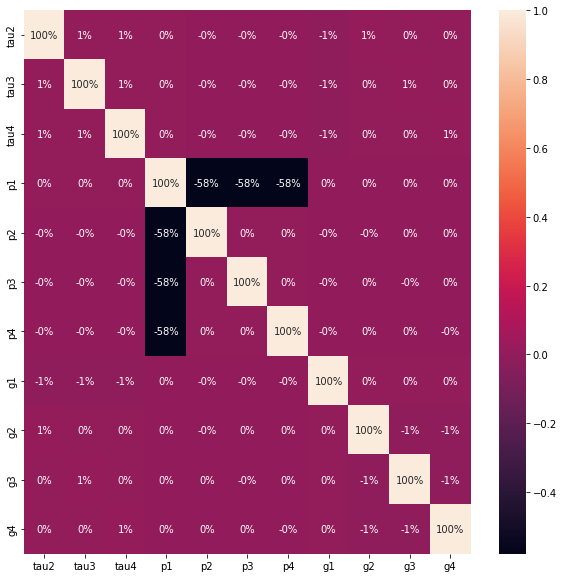

In [ ]:
#visualize the correlation 
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True,fmt=".0%")

In [ ]:
#split the data set into independant (x) and dependant (y) data sets 
X= df.iloc[:,2:31].values
Y=df.iloc[:,13].values
type(df)

pandas.core.frame.DataFrame

In [ ]:
from pandas.core.common import random_state
#split the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split (X,Y,test_size= 0.25, random_state = 0 )


In [ ]:
#scale the data (feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#create a function for the models 

def models (X_train,Y_train):
  
   #logistics regression 
   from sklearn.linear_model import LogisticRegression
   log = LogisticRegression(random_state=0)
   log.fit(X_train,Y_train)
   
   #decsion tree
   from sklearn.tree import DecisionTreeClassifier 
   tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
   tree.fit(X_train,Y_train)

   #random forest classifier
   from sklearn.ensemble import RandomForestClassifier
   forest = RandomForestClassifier(n_estimators= 10 , criterion = "entropy", random_state= 0 )
   forest.fit(X_train,Y_train)
   
   #print the models accuracy on the training data
   print("[0] logistic regression Training Accuracy:", log.score (X_train, Y_train))
   print("[1] Decision Tree Classifier Training Accurcay:",tree.score(X_train, Y_train))
   print("[2] Random Forest Classifier Training Accuracy:", forest.score(X_train, Y_train))
   
   return log,tree,forest 

In [ ]:
#getting all of the models 
model=models(X_train,Y_train)


[0] logistic regression Training Accuracy: 1.0
[1] Decision Tree Classifier Training Accurcay: 1.0
[2] Random Forest Classifier Training Accuracy: 1.0


In [ ]:
#test model accuracy on data on confucion matrixs
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,model[0].predict(X_test))

TP = cm[0][0]
TN=cm[1][1]
FN = cm[1][0]
FP=cm[0][1]


print(cm)
print ("testing accuracy =", (TP+TN)/(TP+TN+FN+FP))

[[5375    0]
 [   0 9625]]
testing accuracy = 1.0


In [ ]:
#show another way to get metrics from the models
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score

print ( classification_report,(Y_test, model[0].predict(X_test)))
print ( accuracy_score(Y_test, model[0].predict(X_test)))

<function classification_report at 0x7f713e5bd560> (array([1, 1, 1, ..., 1, 1, 1]), array([1, 1, 1, ..., 1, 1, 1]))
1.0


In [ ]:
#print the prediction of the random forest classifier model
pred=model[2].predict(X_test)
print (pred)
print()
print(Y_test)

[1 1 1 ... 1 1 1]

[1 1 1 ... 1 1 1]
